In [ ]:
# importing all packages

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from random import uniform
from torch.utils.data import DataLoader, TensorDataset, Dataset
from PIL import Image

In [ ]:
# Helper function for saving GIFs

def save_gif_PIL(outfile, files, fps=5, loop=0):
    imgs = [Image.open(file) for file in files]
    imgs[0].save(fp=outfile, format='GIF', append_images=imgs[1:], save_all=True, duration=int(1000/fps), loop=loop)

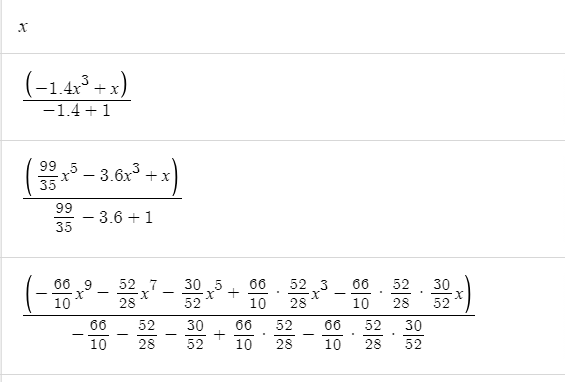

In [ ]:
# Analytical solutions for n = 0, 2, 4

def analytic_solution_n_0(x):
  return x

def analytic_solution_n_2(x):
  return (-1.4 * (x**3) + x) / (-1.4 + 1)

def analytic_solution_n_4(x):
  return (99 / 35 * (x**5) - 3.6 * (x**3) + x) / (99 / 35 - 3.6 + 1)

def plot_analytic_solution(x, n_0, n_2, n_4):
  fig, ax = plt.subplots()
  ax.set_xlim(0, 1.5)
  ax.set_ylim(-1.5, 1.5)

  ax.spines['bottom'].set_position('center')
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  ax.set_title(f"Analytical Solutions")

  n_0, = ax.plot(x, n_0, lw=2, color='blue', label='n=0')
  n_2, = ax.plot(x, n_2, lw=2, color='orange', label='n=2')
  n_4, = ax.plot(x, n_4, lw=2, color='green', label='n=4')

  ax.legend(loc='upper right')


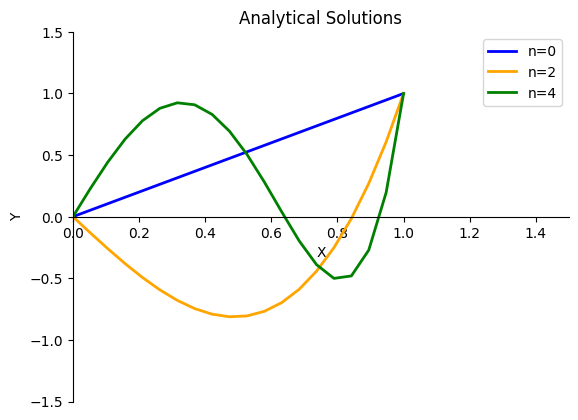

In [ ]:
x = np.linspace(0, 0.5, 20)

n_0 = analytic_solution_n_0(x)
n_2 = analytic_solution_n_2(x)
n_4 = analytic_solution_n_4(x)

plot_analytic_solution(x, n_0, n_2, n_4)


In [ ]:
# import torch.nn as nn

class FCN(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super(FCN, self).__init__()
        activation = nn.Tanh
        # Input layer to the first hidden layer
        self.fcs = nn.Sequential(
            nn.Linear(N_INPUT, N_HIDDEN),
            activation()
        )
        # Hidden layers
        self.fch = nn.Sequential(*[
            nn.Sequential(
                nn.Linear(N_HIDDEN, N_HIDDEN),
                activation()
            ) for _ in range(N_LAYERS - 1)
        ])
        # Output layer
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)

    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x


In [ ]:
class MyDataset(Dataset):
    def __init__(self):
        self.x_data = []
        self.y_data = []
        self.dataset_len = 0

    def add_sample(self, x, y):
        self.x_data.append(x)
        self.y_data.append(y)
        self.dataset_len += 1

    def __len__(self):
        return self.dataset_len

    def __getitem__(self, idx):
        return {'x': self.x_data[idx], 'time': self.time_data[idx], 'y': self.y_data[idx]}

    def print_dataset(self):
        return self.x_data, self.y_data


In [ ]:
n_2_dataset = MyDataset()
percentage_of_noise = 0.03

for i, j in zip(x, n_2):
  a = uniform(-percentage_of_noise, percentage_of_noise) + 1
  b = uniform(-percentage_of_noise, percentage_of_noise) + 1
  n_2_dataset.add_sample(a * i, b * j)

In [ ]:
def plot_noisy_data(noisy_dataset):
  fig, ax = plt.subplots()
  ax.set_xlim(0, 1.5)
  ax.set_ylim(-1.5, 1.5)

  ax.spines['bottom'].set_position('center')
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  ax.set_title(f"Noisy Data")

  noisy_data = ax.scatter(noisy_dataset.x_data, noisy_dataset.y_data, color="tab:orange", label="Noisy Training Data", s=8)

  ax.legend(loc='upper right')


In [ ]:
x = np.linspace(0, 0.5, 10)

n_0 = analytic_solution_n_0(x)
n_2 = analytic_solution_n_2(x)
n_4 = analytic_solution_n_4(x)

# plot_analytic_solution(x, n_0, n_2, n_4)
n_2_dataset = MyDataset()
percentage_of_noise = 0.03

for i, j in zip(x, n_2):
  a = uniform(-percentage_of_noise, percentage_of_noise) + 1
  b = uniform(-percentage_of_noise, percentage_of_noise) + 1
  n_2_dataset.add_sample(a * i, b * j)

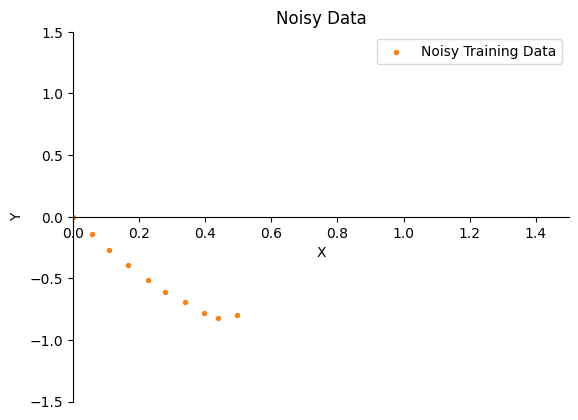

In [ ]:
plot_noisy_data(n_2_dataset)

In [ ]:
def save_gif_PIL(outfile, files, fps=5, loop=0):
    imgs = [Image.open(file) for file in files]
    imgs[0].save(fp=outfile, format='GIF', append_images=imgs[1:], save_all=True, duration=int(1000/fps), loop=loop)

In [ ]:
def plot_result(x, y, x_data, y_data):
  plt.figure(figsize=(1, 5))
  fig, ax = plt.subplots()
  ax.set_xlim(0, 1.5)
  ax.set_ylim(-1.5, 1.5)

  ax.scatter(x_data, y_data, s=8, color="tab:orange", alpha=0.4, label='Training data')

  ax.spines['bottom'].set_position('center')
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  ax.set_title("Neural Network Performance")

  result = ax.plot(x, y, lw=2, color='blue', label='Neural Network')
  ax.text(0.1, 1, "Training step: %i"%(i+1), size=12, color="k")

  ax.legend(loc='upper right')

In [ ]:
x_data = torch.tensor(n_2_dataset.x_data, dtype=torch.float32).view(-1, 1)
y_data = torch.tensor(n_2_dataset.y_data, dtype=torch.float32).view(-1, 1)

# train standard neural network to fit training data
torch.manual_seed(123)
model = FCN(1,1,32,3)
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3)
files = []
epoch = 300
for i in range(epoch):
    optimizer.zero_grad()
    yh = model(x_data)
    loss = torch.mean((yh-y_data)**2)# use mean squared error
    loss.backward()
    optimizer.step()

    # print(type(x_data))
    # print(type(y_data))
    # print(type(yh2))


    if (i+1) % 10 == 0:

        yh2 = yh.tolist()
        plot_result(n_2_dataset.x_data, yh2, x_data.detach().numpy(), y_data.detach().numpy())

        file = "plots/nn_%.8i.png"%(i+1)
        plt.savefig(file, bbox_inches='tight', pad_inches=0.1, dpi=100, facecolor="white")
        files.append(file)

save_gif_PIL("nn.gif", files, fps=20, loop=0)

yh = model(x_data)

<Figure size 100x500 with 0 Axes>

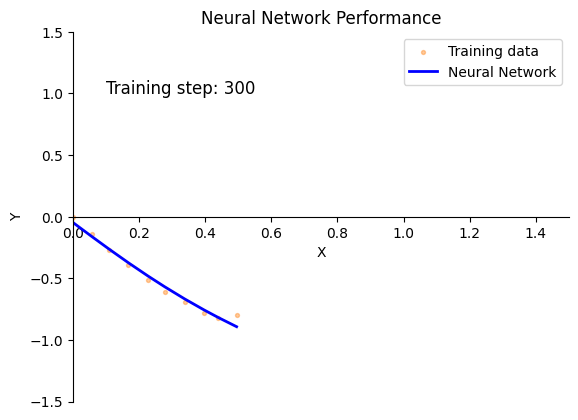

In [ ]:
x_data, yh = x_data.tolist(), yh.tolist()
plot_result(n_2_dataset.x_data, yh2, x_data, y_data)

20
20
20
10
10


<Figure size 100x500 with 0 Axes>

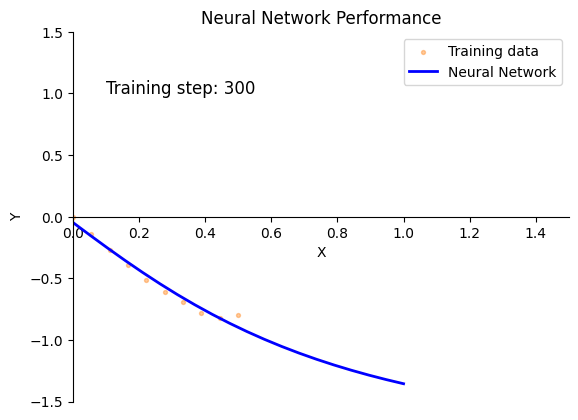

In [ ]:
x2 = np.linspace(0, 1, 20)

x_data2 = torch.tensor(x2, dtype=torch.float32).view(-1, 1)
print(len(x2))
print(len(x_data2))
yh = model(x_data2)
print(len(yh))
print(len(x))
print(len(y_data))
plot_result(x2, yh.tolist(), x, y_data)

In [ ]:
# import torch.nn as nn

class FCN_PINN(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super(FCN, self).__init__()
        activation = nn.Tanh
        # Input layer to the first hidden layer
        self.fcs = nn.Sequential(
            nn.Linear(N_INPUT, N_HIDDEN),
            activation()
        )
        # Hidden layers
        self.fch = nn.Sequential(*[
            nn.Sequential(
                nn.Linear(N_HIDDEN, N_HIDDEN),
                activation()
            ) for _ in range(N_LAYERS - 1)
        ])
        # Output layer
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)

    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x


In [ ]:
x_data = torch.tensor(n_2_dataset.x_data, dtype=torch.float32, requires_grad=True).view(-1, 1)
y_data = torch.tensor(n_2_dataset.y_data, dtype=torch.float32).view(-1, 1)
n = 2
A = n**2 + 5 * n + 4

# train standard neural network to fit training data
torch.manual_seed(123)
model_pinn = FCN(1,1,32,3)
optimizer = torch.optim.Adam(model_pinn.parameters(),lr=1e-3)
files = []
epoch = 500
x_bound = torch.tensor(1.).view(-1,1).requires_grad_(True)
for i in range(epoch):
    optimizer.zero_grad()
    yh = model_pinn(x_data)
    loss1 = torch.mean((yh - y_data)**2) # Mean squared error

    # Physics loss with squared term
    # yhp = model_pinn(x_data)
    # dydx = torch.autograd.grad(yhp, x_data, torch.ones_like(yhp), create_graph=True)[0]
    # d2ydx = torch.autograd.grad(dydx,  x_data, torch.ones_like(dydx),  create_graph=True)[0]# computes d^2y/dx^2
    # physics = ( x_data ** 2 - x_data ** 4) * d2ydx + dydx * (2 * x_data - 4 * (x_data ** 3)) + yhp * (A * x_data * x_data - 2)
    u = model_pinn(x_bound)
    loss2 = (torch.squeeze(u) - 1)**2
    # loss3 =  torch.mean(physics**2)

    loss = loss1 + loss2

    loss.backward()

    # Gradient clipping
    # torch.nn.utils.clip_grad_norm_(model_pinn.parameters(), max_norm=1.0)

    optimizer.step()

    if (i+1) % 10 == 0:
        print(loss1, loss3)

        yh2 = yh.tolist()
        plot_result(n_2_dataset.x_data, yh2, x_data.detach().numpy(), y_data)

        file = "plots/nn_%.8i.png"%(i+1)
        plt.savefig(file, bbox_inches='tight', pad_inches=0.1, dpi=100, facecolor="white")
        files.append(file)

save_gif_PIL("pinn.gif", files, fps=20, loop=0)

yh = model(x_data)

20
20
20
10
10


<Figure size 100x500 with 0 Axes>

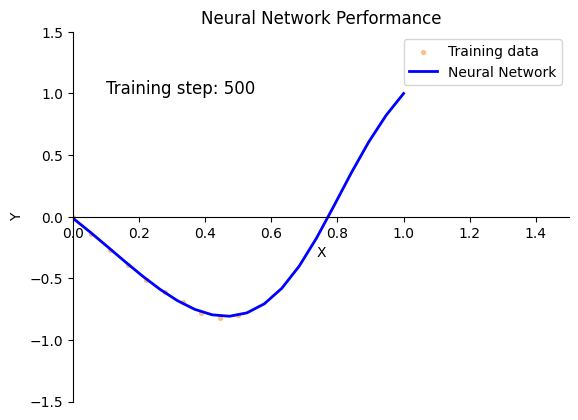

In [ ]:
x2 = np.linspace(0, 1, 20)

print(len(x2))
print(len(x_data2))
yh = model_pinn(x_data2)
print(len(yh))
print(len(x))
print(len(y_data))
plot_result(x2, yh.tolist(), x, y_data)

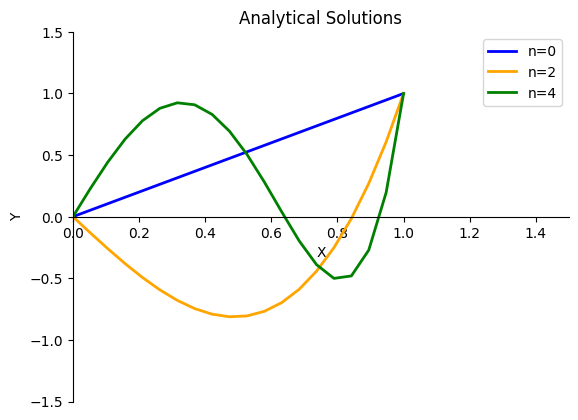

In [ ]:
plot_analytic_solution(x, n_0, n_2, n_4)

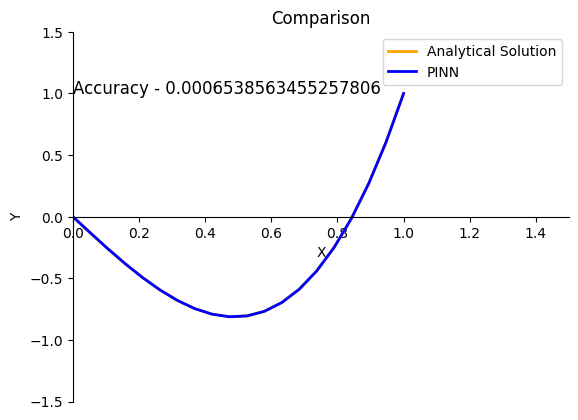

In [ ]:
def plot_pinn_solution(x_analytical, y_analytical, y_pinn):

  accuracy = sum((y_pinn - y_analytical) ** 2) / len(y_analytical)
  fig, ax = plt.subplots()
  ax.set_xlim(0, 1.5)
  ax.set_ylim(-1.5, 1.5)

  ax.spines['bottom'].set_position('center')
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')

  ax.set_xlabel("X")
  ax.set_ylabel("Y")
  ax.set_title(f"Comparison")

  n, = ax.plot(x_analytical, n_2, lw=2, color='orange', label='Analytical Solution')

  result = ax.plot(x_analytical, y_analytical, lw=2, color='blue', label='PINN')
  ax.text(0, 1, f"Accuracy - {accuracy}", size=12, color="k")


  ax.legend(loc='upper right')

# def plot_result(x, y, x_data, y_data):
#   plt.figure(figsize=(1, 5))
#   fig, ax = plt.subplots()
#   ax.set_xlim(0, 1.5)
#   ax.set_ylim(-1.5, 1.5)

#   ax.scatter(x_data, y_data, s=8, color="tab:orange", alpha=0.4, label='Training data')

#   ax.spines['bottom'].set_position('center')
#   ax.spines['top'].set_color('none')
#   ax.spines['right'].set_color('none')

#   ax.set_xlabel("X")
#   ax.set_ylabel("Y")
#   ax.set_title("Neural Network Performance")

#   result = ax.plot(x, y, lw=2, color='blue', label='Neural Network')
#   ax.text(0.1, 1, "Training step: %i"%(i+1), size=12, color="k")

#   ax.legend(loc='upper right')

yh = model_pinn(x_data2)

n_2 = analytic_solution_n_2(x2)
# print(n_2)
# print(yh)
a = []
for i in yh.tolist():
  a.append(i[0])

yh = a
# print(yh)

plot_pinn_solution(x2, n_2, yh)